## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
%matplotlib inline

## Importing Dataset 

In [4]:
book=pd.read_csv('book.csv')
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [5]:
book.shape

(2000, 11)

In [7]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [3]:
book.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

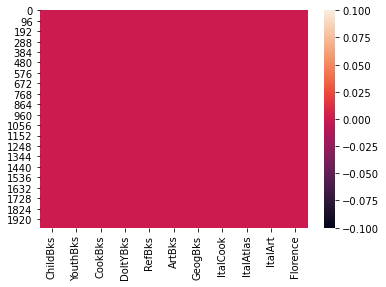

In [6]:
sns.heatmap(book.isnull())
plt.show()

* No null value

## Apriori Model 

Considering support = 0.05

In [4]:
frequent_itemsets=apriori(book, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(YouthBks, DoItYBks, GeogBks, CookBks)"
96,0.0560,"(YouthBks, ArtBks, GeogBks, CookBks)"
97,0.0650,"(DoItYBks, ArtBks, GeogBks, CookBks)"
98,0.0510,"(YouthBks, DoItYBks, GeogBks, ChildBks, CookBks)"


In [5]:
book_rule=association_rules(frequent_itemsets, metric='lift', min_threshold=0.5)
book_rule.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.184,0.652482,1.542511,0.064714,1.660347


In [6]:
book_rule.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
184,(ItalCook),"(YouthBks, CookBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
181,"(YouthBks, CookBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
512,"(GeogBks, CookBks)","(ItalCook, ChildBks)",0.1925,0.0850,0.0525,0.272727,3.208556,0.036137,1.258125
509,"(ItalCook, ChildBks)","(GeogBks, CookBks)",0.0850,0.1925,0.0525,0.617647,3.208556,0.036137,2.111923
513,"(ChildBks, CookBks)","(ItalCook, GeogBks)",0.2560,0.0640,0.0525,0.205078,3.204346,0.036116,1.177474
508,"(ItalCook, GeogBks)","(ChildBks, CookBks)",0.0640,0.2560,0.0525,0.820312,3.204346,0.036116,4.140522
646,"(ArtBks, ChildBks, CookBks)","(DoItYBks, GeogBks)",0.1265,0.1325,0.0535,0.422925,3.191886,0.036739,1.503271
647,"(DoItYBks, GeogBks)","(ArtBks, ChildBks, CookBks)",0.1325,0.1265,0.0535,0.403774,3.191886,0.036739,1.465047
514,(ItalCook),"(ChildBks, GeogBks, CookBks)",0.1135,0.1495,0.0525,0.462555,3.094014,0.035532,1.582488
507,"(ChildBks, GeogBks, CookBks)",(ItalCook),0.1495,0.1135,0.0525,0.351171,3.094014,0.035532,1.366307


In [7]:
book_rule[book_rule.lift>2.8]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
110,"(ChildBks, CookBks)",(ItalCook),0.2560,0.1135,0.0850,0.332031,2.925385,0.055944,1.327158
111,(ItalCook),"(ChildBks, CookBks)",0.1135,0.2560,0.0850,0.748899,2.925385,0.055944,2.962947
181,"(YouthBks, CookBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
184,(ItalCook),"(YouthBks, CookBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
258,"(ArtBks, CookBks)",(ItalCook),0.1670,0.1135,0.0565,0.338323,2.980822,0.037545,1.339778
263,(ItalCook),"(ArtBks, CookBks)",0.1135,0.1670,0.0565,0.497797,2.980822,0.037545,1.658693
266,"(GeogBks, CookBks)",(ItalCook),0.1925,0.1135,0.0640,0.332468,2.929229,0.042151,1.328025
267,(ItalCook),"(GeogBks, CookBks)",0.1135,0.1925,0.0640,0.563877,2.929229,0.042151,1.851540
354,"(YouthBks, DoItYBks)","(RefBks, ChildBks)",0.1155,0.1515,0.0530,0.458874,3.028874,0.035502,1.568028
355,"(YouthBks, ChildBks)","(DoItYBks, RefBks)",0.1650,0.1055,0.0530,0.321212,3.044665,0.035592,1.317790


In [8]:
book_rule[(book_rule.confidence>0.5) & (book_rule.lift>2.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
111,(ItalCook),"(ChildBks, CookBks)",0.1135,0.2560,0.0850,0.748899,2.925385,0.055944,2.962947
184,(ItalCook),"(YouthBks, CookBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
267,(ItalCook),"(GeogBks, CookBks)",0.1135,0.1925,0.0640,0.563877,2.929229,0.042151,1.851540
356,"(YouthBks, RefBks)","(DoItYBks, ChildBks)",0.0965,0.1840,0.0530,0.549223,2.984907,0.035244,1.810207
358,"(DoItYBks, RefBks)","(YouthBks, ChildBks)",0.1055,0.1650,0.0530,0.502370,3.044665,0.035592,1.677952
508,"(ItalCook, GeogBks)","(ChildBks, CookBks)",0.0640,0.2560,0.0525,0.820312,3.204346,0.036116,4.140522
509,"(ItalCook, ChildBks)","(GeogBks, CookBks)",0.0850,0.1925,0.0525,0.617647,3.208556,0.036137,2.111923
578,"(YouthBks, ArtBks)","(GeogBks, CookBks)",0.1010,0.1925,0.0560,0.554455,2.880288,0.036557,1.812389
607,"(YouthBks, DoItYBks, GeogBks)","(ChildBks, CookBks)",0.0680,0.2560,0.0510,0.750000,2.929687,0.033592,2.976000
611,"(YouthBks, GeogBks, CookBks)","(DoItYBks, ChildBks)",0.0970,0.1840,0.0510,0.525773,2.857463,0.033152,1.720696


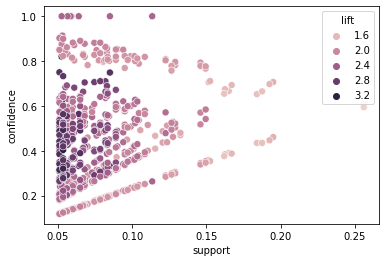

In [9]:
sns.scatterplot(data=book_rule,x='support',y='confidence',hue='lift', s= 50)
plt.show()

### Now, considering support = 0.1

In [10]:
frequent_itemsets2=apriori(book, min_support=0.1, use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [11]:
book_rule2=association_rules(frequent_itemsets2, metric='lift', min_threshold=0.5)
book_rule2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464


In [12]:
book_rule2[book_rule2.lift>2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
42,"(ChildBks, CookBks)",(YouthBks),0.2560,0.2475,0.1290,0.503906,2.035985,0.065640,1.516850
43,(YouthBks),"(ChildBks, CookBks)",0.2475,0.2560,0.1290,0.521212,2.035985,0.065640,1.553924
48,"(ChildBks, CookBks)",(DoItYBks),0.2560,0.2820,0.1460,0.570312,2.022385,0.073808,1.670982
49,(DoItYBks),"(ChildBks, CookBks)",0.2820,0.2560,0.1460,0.517730,2.022385,0.073808,1.542706
54,"(ChildBks, CookBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277
55,(RefBks),"(ChildBks, CookBks)",0.2145,0.2560,0.1225,0.571096,2.230842,0.067588,1.734652
60,"(ChildBks, CookBks)",(ArtBks),0.2560,0.2410,0.1265,0.494141,2.050376,0.064804,1.500417
61,(ArtBks),"(ChildBks, CookBks)",0.2410,0.2560,0.1265,0.524896,2.050376,0.064804,1.565974


In [13]:
book_rule2[(book_rule2.confidence>0.5)&(book_rule2.lift>2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
42,"(ChildBks, CookBks)",(YouthBks),0.2560,0.2475,0.1290,0.503906,2.035985,0.065640,1.516850
43,(YouthBks),"(ChildBks, CookBks)",0.2475,0.2560,0.1290,0.521212,2.035985,0.065640,1.553924
48,"(ChildBks, CookBks)",(DoItYBks),0.2560,0.2820,0.1460,0.570312,2.022385,0.073808,1.670982
49,(DoItYBks),"(ChildBks, CookBks)",0.2820,0.2560,0.1460,0.517730,2.022385,0.073808,1.542706
55,(RefBks),"(ChildBks, CookBks)",0.2145,0.2560,0.1225,0.571096,2.230842,0.067588,1.734652
61,(ArtBks),"(ChildBks, CookBks)",0.2410,0.2560,0.1265,0.524896,2.050376,0.064804,1.565974
66,"(ChildBks, CookBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319
67,(GeogBks),"(ChildBks, CookBks)",0.2760,0.2560,0.1495,0.541667,2.115885,0.078844,1.623273
70,"(DoItYBks, ChildBks)",(GeogBks),0.1840,0.2760,0.1045,0.567935,2.057735,0.053716,1.675673


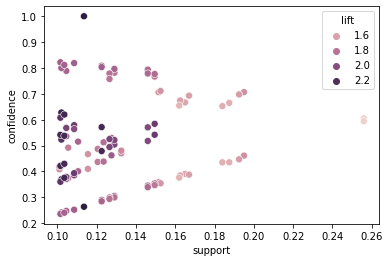

In [14]:
sns.scatterplot(data=book_rule2,x='support',y='confidence',hue='lift', s= 50)
plt.show()